## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [36]:

"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [37]:
import os
import keras

# 請嘗試設定 GPU：os.environ   or
# 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [38]:
train, test = keras.datasets.cifar10.load_data()

In [39]:
## 資料前處理
"""
Your code here
"""
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

In [40]:


x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [51]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [52]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [53]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [54]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 209us/step - loss: 1.9373 - acc: 0.3002 - val_loss: 1.7565 - val_acc: 0.3709
Epoch 2/100
50000/50000 [==============================] - 11s 213us/step - loss: 1.7002 - acc: 0.3910 - val_loss: 1.6401 - val_acc: 0.4155
Epoch 3/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.6209 - acc: 0.4206 - val_loss: 1.6029 - val_acc: 0.4429
Epoch 4/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.5540 - acc: 0.4472 - val_loss: 1.5051 - val_acc: 0.4722
Epoch 5/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.4973 - acc: 0.4649 - val_loss: 1.5215 - val_acc: 0.4595
Epoch 6/100
50000/50000 [==============================] - 10s 192us/step - loss: 1.4631 - acc: 0.4779 - val_loss: 1.4910 - val_acc: 0.4730
Epoch 7/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.4297 - acc: 0.4911 - val_lo

50000/50000 [==============================] - 10s 206us/step - loss: 0.5566 - acc: 0.7999 - val_loss: 2.0582 - val_acc: 0.5131
Epoch 60/100
50000/50000 [==============================] - 10s 197us/step - loss: 0.5310 - acc: 0.8104 - val_loss: 2.1138 - val_acc: 0.5119
Epoch 61/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.5139 - acc: 0.8139 - val_loss: 2.0978 - val_acc: 0.5082
Epoch 62/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.4995 - acc: 0.8226 - val_loss: 2.1321 - val_acc: 0.5027
Epoch 63/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.4891 - acc: 0.8271 - val_loss: 2.1540 - val_acc: 0.5062
Epoch 64/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.4753 - acc: 0.8300 - val_loss: 2.1674 - val_acc: 0.5132
Epoch 65/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.4883 - acc: 0.8257 - val_loss: 2.1674 - val_acc: 0.5053
Epoch 66/100
50000/50000 [=====

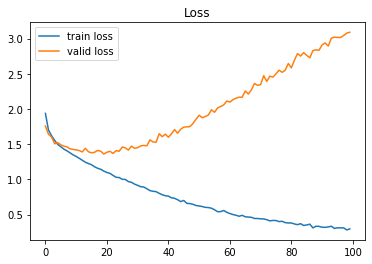

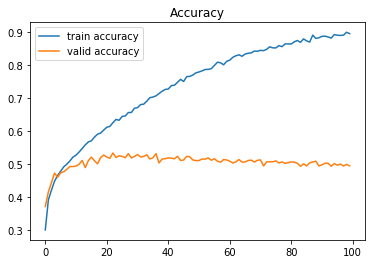

In [55]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()